In [24]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def get_contours_image(image_path):
    image = cv.imread(image_path)
    image = cv.Canny(image, 50, 200)
    return image

In [26]:
template = get_contours_image("template.png")
cv.imwrite("test.png", template)

positive_dir = "positive_class/"
negative_dir = "negative_class/"
dummy_dir = "dummy_example/"
method = cv.CONTOURS_MATCH_I2

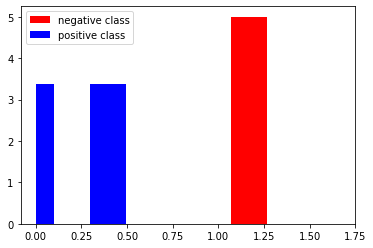

In [27]:
dummy_dist_pos = []
dummy_dist_neg = []
for _, _, file_paths in os.walk(dummy_dir):
    for file_path in file_paths:
        target = get_contours_image(os.path.join(dummy_dir, file_path))
        dist = cv.matchShapes(template, target, method, 0)
        if file_path == "outlier.png":
            dummy_dist_neg.append(dist)
        else:
            dummy_dist_pos.append(dist)
plt.hist(dummy_dist_neg, color = 'red', bins = 5, density=True, label="negative class")
plt.hist(dummy_dist_pos, color = 'blue', bins = 5, density=True, label="positive class")
plt.legend()


In [28]:
positive_dist = []
negative_dist = []

for _, _, file_paths in os.walk(positive_dir):
    for file_path in file_paths:
        target = get_contours_image(os.path.join(positive_dir, file_path))
        dist = cv.matchShapes(template, target, method, 0)
        positive_dist.append(dist)

for _, _, file_paths in os.walk(negative_dir):
    for file_path in file_paths:
        target = get_contours_image(os.path.join(negative_dir, file_path))
        dist = cv.matchShapes(template, target, method, 0)
        negative_dist.append(dist)

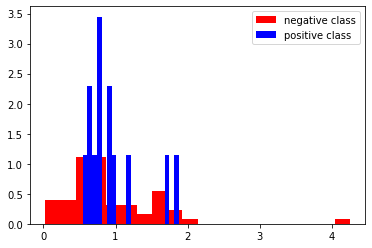

In [29]:
plt.hist(negative_dist, color = 'red', bins = 20, density=True, label="negative class")
plt.hist(positive_dist, color = 'blue', bins = 20, density=True, label="positive class")
plt.legend()